In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
%matplotlib inline

In [3]:
#graph and session
graph=tf.Graph()
session=tf.Session(graph=graph)

In [4]:
 #load raw data from disk
pic=mpimg.imread("1.jpg")
#type of pic
print("type of pic:",type(pic))
#shape of pic
print("shape of pic:",pic.shape)

type of pic: <class 'numpy.ndarray'>
shape of pic: (1242, 1239, 3)


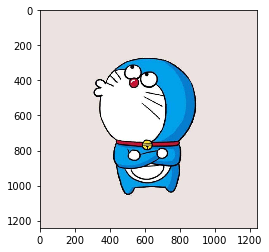

In [5]:
#show pic
plt.imshow(pic)

# dtype trans

***convert_image_dtype(image,dtype,saturate=False,name=None)***
>作用：把图片元素类型，转成想要的类型，**返回转换后的图片,注意，要是转成了float类型之后，像素值会在 [0,1)这个范围内**。

>参数:

>**image:** 图像

>**dtype:** 待转换类型

>**saturate:** If True, clip the input before casting (if necessary).

>**name:** 可选操作名

# resize

***resize_images(images,size,method=ResizeMethod.BILINEAR,align_corners=False)***
>作用:使用指定的方法来改变形状
>参数:

>**images:** 4维tensor,形状为 [batch, height, width, channels] 或者3维tensor,形状为 [height, width, channels].

>**size:** 1维 int32类型的 Tensor,包含两个元素:new_height, new_width.

>**method:** 改变形状的方法,默认是`ResizeMethod.BILINEAR`.

>>**ResizeMethod.BILINEAR:** Bilinear interpolation.

>>**ResizeMethod.NEAREST_NEIGHBOR:** Nearest neighbor interpolation.

>>**ResizeMethod.BICUBIC:** Bicubic interpolation.

>>**ResizeMethod.AREA:** Area interpolation.

>**align_corners:** bool. If true, exactly align all 4 corners of the input and output. Defaults to false.

In [6]:
with graph.as_default():
    #convert type
    pic_dtype_changed=tf.image.convert_image_dtype(image=pic,dtype=tf.float32)
    #resized by Bilinear interpolation.
    resized_Bilinear=tf.image.resize_images(images=pic,size=(224,224))

type change
type of pic: float32
[[[ 0.92549026  0.88627458  0.88235301]
  [ 0.92549026  0.88627458  0.88235301]
  [ 0.92549026  0.88627458  0.88235301]
  ..., 
  [ 0.92549026  0.88627458  0.88235301]
  [ 0.92549026  0.88627458  0.88235301]
  [ 0.92549026  0.88627458  0.88235301]]

 [[ 0.92549026  0.88627458  0.88235301]
  [ 0.92549026  0.88627458  0.88235301]
  [ 0.92549026  0.88627458  0.88235301]
  ..., 
  [ 0.92549026  0.88627458  0.88235301]
  [ 0.92549026  0.88627458  0.88235301]
  [ 0.92549026  0.88627458  0.88235301]]

 [[ 0.92549026  0.88627458  0.88235301]
  [ 0.92549026  0.88627458  0.88235301]
  [ 0.92549026  0.88627458  0.88235301]
  ..., 
  [ 0.92549026  0.88627458  0.88235301]
  [ 0.92549026  0.88627458  0.88235301]
  [ 0.92549026  0.88627458  0.88235301]]

 ..., 
 [[ 0.92549026  0.88627458  0.88235301]
  [ 0.92549026  0.88627458  0.88235301]
  [ 0.92549026  0.88627458  0.88235301]
  ..., 
  [ 0.92549026  0.88627458  0.88235301]
  [ 0.92549026  0.88627458  0.88235301]
  

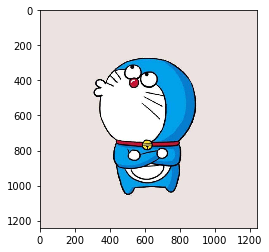

In [7]:
with session.as_default():
    print("type change")
    pic_run=session.run(pic_dtype_changed)
    print("type of pic:",pic_run.dtype)
    print(pic_run)
    plt.imshow(pic_run)

resized by Bilinear interpolation
(224, 224, 3)


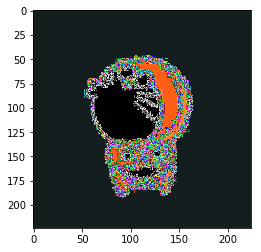

In [8]:
with session.as_default():
    print("resized by Bilinear interpolation")
    pic_resized=session.run(resized_Bilinear)
    print(pic_resized.shape)
    plt.imshow(pic_resized)

# flip

In [9]:
with graph.as_default():
    #flip leaf right
    flipped=tf.image.flip_left_right(image=pic)

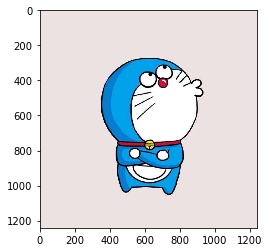

In [10]:
with session.as_default():
    pic_flip=session.run(flipped)
    plt.imshow(pic_flip)

# bright

In [11]:
with graph.as_default():
    #bright
    brighted=tf.image.adjust_brightness(image=pic,delta=0.1)

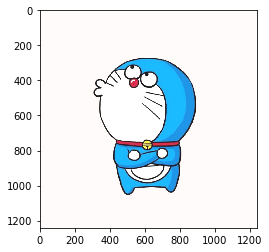

In [12]:
with session.as_default():
    pic_bright=session.run(brighted)
    plt.imshow(pic_bright)